In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
train= pd.read_csv("C:/Users/happy/Desktop/Strathclyde academic/Sem 2/CS986/Assignment/Score/CS98XRegressionTrain.csv",low_memory=False)
test= pd.read_csv("C:/Users/happy/Desktop/Strathclyde academic/Sem 2/CS986/Assignment/Score/CS98XRegressionTest.csv",low_memory=False)

In [3]:
train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [4]:
#check missing
train.isnull().any()

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [5]:
#check missing
test.isnull().any()

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

In [6]:
incomplete_train = train[train.isnull().any(axis=1)].head()
incomplete_train 

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
26,27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
72,73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
90,91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29


In [7]:
# drop NA in train
train=train.dropna(subset=["top genre"])

In [8]:
train

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [9]:
incomplete_test = test[test.isnull().any(axis=1)].head()
incomplete_test

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
66,520,We Are The World,U.S.A. For Africa,NaN,1985,73,45,53,-15,7,29,427,19,4


In [10]:
# drop NA in test
test=test.dropna(subset=["top genre"])

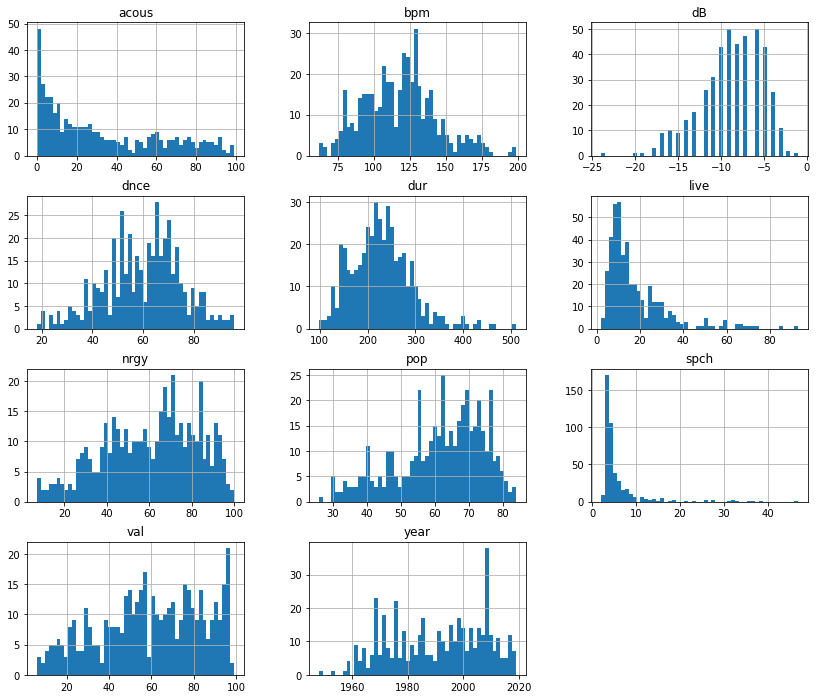

In [11]:
%matplotlib inline
train.drop(['Id'],axis=1).hist(bins=50, figsize=(14,12))
plt.show()

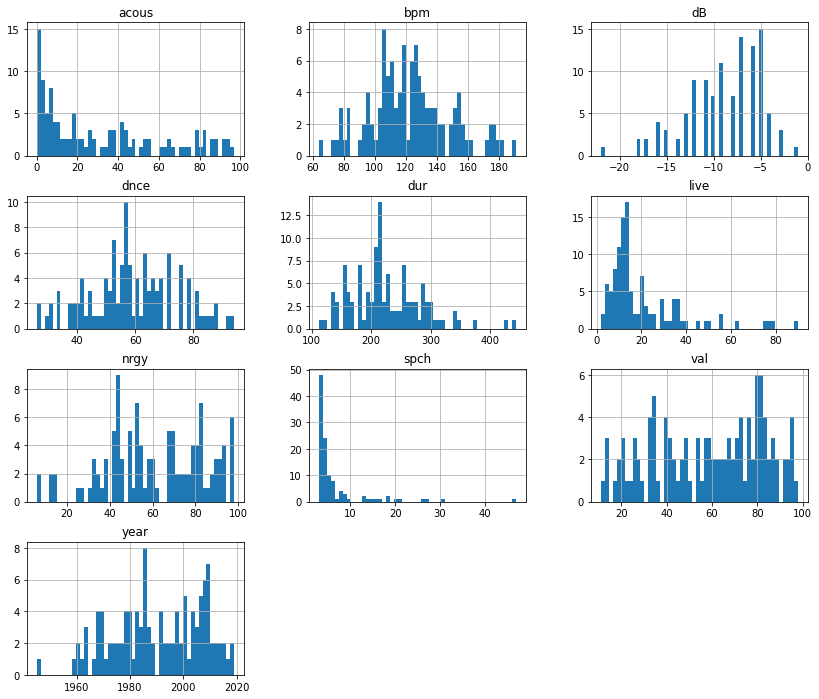

In [12]:
%matplotlib inline
test.drop(['Id'],axis=1).hist(bins=50, figsize=(14,12))
plt.show()

In [13]:
# Recode top genre

In [14]:
# rename top genre
train.rename(columns={'top genre':'top_genre'}, inplace=True)
test.rename(columns={'top genre':'top_genre'}, inplace=True)

In [15]:
# make a copy of top_genre for onehotencoder
top_genre_cat= train["top_genre"]
top_genre_cat.head()

0    adult standards
2    adult standards
3    adult standards
4          glam rock
5                pop
Name: top_genre, dtype: object

In [16]:
# top_genre_cat_encoded as category codes
# top_genre_cat_name as category names

top_genre_cat_encoded, top_genre_cat_name = top_genre_cat.factorize()

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Need to reshape into 2-d array
top_genre_cat_1hot = cat_encoder.fit_transform(top_genre_cat_encoded.reshape(-1,1))
enc_data_top_genre = pd.DataFrame(top_genre_cat_1hot.toarray())

# Replace column codes with column names
enc_data_top_genre.columns = top_genre_cat_name
# This is the row index ( to keep the row index constant)
enc_data_top_genre.index = train.index

# drop first column 
enc_data_top_genre.drop('adult standards', axis=1, inplace=True)

enc_data_top_genre

,glam rock,pop,album rock,boy band,brill building pop,rock-and-roll,country rock,canadian pop,dance pop,europop,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# make a copy of artist for onehotencoder
artist_cat= train["artist"]
artist_cat.head()

0      Connie Francis
2            Bee Gees
3    Barbra Streisand
4          Elton John
5          Bruno Mars
Name: artist, dtype: object

In [18]:
# artist_cat_encoded as category codes
# artist_cat_name as category names

artist_cat_encoded, artist_cat_name = artist_cat.factorize()

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Need to reshape into 2-d array
artist_cat_1hot = cat_encoder.fit_transform(artist_cat_encoded.reshape(-1,1))
enc_data_artist = pd.DataFrame(artist_cat_1hot.toarray())

# Replace column codes with column names
enc_data_artist.columns = artist_cat_name
# This is the row index ( to keep the row index constant)
enc_data_artist.index = train.index

# drop first column 
enc_data_artist.drop('Connie Francis', axis=1, inplace=True)

enc_data_artist

,Bee Gees,Barbra Streisand,Elton John,Bruno Mars,The Guess Who,Boyz II Men,Timi Yuro,Blue,The Beau Brummels,Adam Faith,...,Captain Hollywood Project,New Order,Pat Boone,Britney Spears,Matthew Wilder,The Searchers,Frankie Valli & The Four Seasons,Peter And Gordon,Nelly,*NSYNC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
# make a copy of year for onehotencoder
year_cat= train["year"]
year_cat.head()

0    1996
2    1979
3    1980
4    1973
5    2010
Name: year, dtype: int64

In [20]:
#Change year to decade
def truncate(n):
    modulus = n%10
    return n-modulus
year_cat = truncate(year_cat)
year_cat

0      1990
2      1970
3      1980
4      1970
5      2010
       ... 
448    1950
449    2010
450    2000
451    2000
452    2000
Name: year, Length: 438, dtype: int64

In [21]:
# year_cat_encoded as category codes
# year_cat_name as category names

year_cat_encoded, year_cat_name = year_cat.factorize()

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Need to reshape into 2-d array
year_cat_1hot = cat_encoder.fit_transform(year_cat_encoded.reshape(-1,1))
enc_data_year = pd.DataFrame(year_cat_1hot.toarray())

# Replace column codes with column names
enc_data_year.columns = year_cat_name
# This is the row index ( to keep the row index constant)
enc_data_year.index = train.index

# drop first column 
enc_data_year.drop(1990, axis=1, inplace=True)

enc_data_year

,1970,1980,2010,2000,1960,1950,1940
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# merge the 3 sets
train_cat_merge= pd.merge(enc_data_top_genre,enc_data_artist,left_index=True,right_index=True)
train_cat= pd.merge(train_cat_merge,enc_data_year,left_index=True,right_index=True)

In [23]:
train_cat

,glam rock,pop,album rock,boy band,brill building pop,rock-and-roll,country rock,canadian pop,dance pop,europop,...,Peter And Gordon,Nelly,*NSYNC,1970,1980,2010,2000,1960,1950,1940
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
# train_cat is the final recoded categories

In [25]:
# numerical scaling

In [26]:
train_num = train.drop(['Id','title','artist','top_genre','year','pop'], axis=1)
num_attribs = list(train_num)

In [27]:
num_attribs

['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

In [28]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
train_num[num_attribs] = std_scaler.fit_transform(train_num[num_attribs])
train_num

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,-0.450411,-1.337201,-0.960594,0.219596,-0.333898,-1.293363,-1.235386,1.463706,-0.480003
2,-0.529944,-1.110591,0.209212,-0.059196,-0.333898,0.301586,0.264116,-0.724593,-0.480003
3,2.054860,-1.473166,-0.830616,-2.010740,-0.333898,-1.088882,0.058921,-0.245903,-0.480003
4,0.106316,-0.612051,-0.245713,0.219596,-0.188883,-0.802610,-0.556664,0.437941,-0.480003
5,-0.331113,-0.204155,0.729126,0.498388,-0.406405,-1.497844,-0.083137,-0.587824,0.059077
...,...,...,...,...,...,...,...,...,...
448,-1.524099,-1.745097,-2.715304,-2.289532,-0.551419,-1.784116,-0.225196,2.044972,-0.300310
449,1.180003,0.928890,-0.440680,-1.174364,0.391175,1.487573,-1.282739,0.608902,-0.480003
450,1.975327,-0.249477,0.859104,0.219596,0.173653,0.056209,0.958622,-0.314287,1.496626
451,1.856029,1.200821,0.274201,1.055972,-0.841448,1.160404,-0.588233,-0.929746,0.418465


In [29]:
# Merge numberical and categorical variables
train_num_cat= pd.merge(train_num,train_cat,left_index=True,right_index=True)
train_num_cat

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,glam rock,...,Peter And Gordon,Nelly,*NSYNC,1970,1980,2010,2000,1960,1950,1940
0,-0.450411,-1.337201,-0.960594,0.219596,-0.333898,-1.293363,-1.235386,1.463706,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.529944,-1.110591,0.209212,-0.059196,-0.333898,0.301586,0.264116,-0.724593,-0.480003,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.054860,-1.473166,-0.830616,-2.010740,-0.333898,-1.088882,0.058921,-0.245903,-0.480003,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.106316,-0.612051,-0.245713,0.219596,-0.188883,-0.802610,-0.556664,0.437941,-0.480003,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.331113,-0.204155,0.729126,0.498388,-0.406405,-1.497844,-0.083137,-0.587824,0.059077,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-1.524099,-1.745097,-2.715304,-2.289532,-0.551419,-1.784116,-0.225196,2.044972,-0.300310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,1.180003,0.928890,-0.440680,-1.174364,0.391175,1.487573,-1.282739,0.608902,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,1.975327,-0.249477,0.859104,0.219596,0.173653,0.056209,0.958622,-0.314287,1.496626,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,1.856029,1.200821,0.274201,1.055972,-0.841448,1.160404,-0.588233,-0.929746,0.418465,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
# make a copy of pop for merging
pop_y= train["pop"]
pop_y

0      44
2      77
3      67
4      63
5      74
       ..
448    45
449    50
450    77
451    62
452    59
Name: pop, Length: 438, dtype: int64

In [31]:
# Convert to datafram
pop_y=pd.DataFrame(pop_y)
pop_y

,pop
0,44
2,77
3,67
4,63
5,74
...,...
448,45
449,50
450,77
451,62


In [32]:
# there is already a column called pop as a value from top_genre therefore we need to rename it 
pop_y.rename(columns={'pop':'pop_y'}, inplace=True)

In [33]:
# Add pop to finalize dataset
# This is the train dataset with "Id" omited as it doesn't add meaning to analysis. 

train_final= pd.concat([train_num_cat,pop_y],axis=1)
train_final

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,glam rock,...,Nelly,*NSYNC,1970,1980,2010,2000,1960,1950,1940,pop_y
0,-0.450411,-1.337201,-0.960594,0.219596,-0.333898,-1.293363,-1.235386,1.463706,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44
2,-0.529944,-1.110591,0.209212,-0.059196,-0.333898,0.301586,0.264116,-0.724593,-0.480003,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77
3,2.054860,-1.473166,-0.830616,-2.010740,-0.333898,-1.088882,0.058921,-0.245903,-0.480003,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,67
4,0.106316,-0.612051,-0.245713,0.219596,-0.188883,-0.802610,-0.556664,0.437941,-0.480003,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63
5,-0.331113,-0.204155,0.729126,0.498388,-0.406405,-1.497844,-0.083137,-0.587824,0.059077,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-1.524099,-1.745097,-2.715304,-2.289532,-0.551419,-1.784116,-0.225196,2.044972,-0.300310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45
449,1.180003,0.928890,-0.440680,-1.174364,0.391175,1.487573,-1.282739,0.608902,-0.480003,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50
450,1.975327,-0.249477,0.859104,0.219596,0.173653,0.056209,0.958622,-0.314287,1.496626,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,77
451,1.856029,1.200821,0.274201,1.055972,-0.841448,1.160404,-0.588233,-0.929746,0.418465,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,62


In [34]:
#Separate X (all independent variables) and Y (pop) for train set
X_train = train_final.iloc[:,:431]
Y_train = train_final.iloc[:,431]

In [35]:
X_train

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,glam rock,...,Peter And Gordon,Nelly,*NSYNC,1970,1980,2010,2000,1960,1950,1940
0,-0.450411,-1.337201,-0.960594,0.219596,-0.333898,-1.293363,-1.235386,1.463706,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.529944,-1.110591,0.209212,-0.059196,-0.333898,0.301586,0.264116,-0.724593,-0.480003,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.054860,-1.473166,-0.830616,-2.010740,-0.333898,-1.088882,0.058921,-0.245903,-0.480003,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.106316,-0.612051,-0.245713,0.219596,-0.188883,-0.802610,-0.556664,0.437941,-0.480003,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.331113,-0.204155,0.729126,0.498388,-0.406405,-1.497844,-0.083137,-0.587824,0.059077,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-1.524099,-1.745097,-2.715304,-2.289532,-0.551419,-1.784116,-0.225196,2.044972,-0.300310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,1.180003,0.928890,-0.440680,-1.174364,0.391175,1.487573,-1.282739,0.608902,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,1.975327,-0.249477,0.859104,0.219596,0.173653,0.056209,0.958622,-0.314287,1.496626,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,1.856029,1.200821,0.274201,1.055972,-0.841448,1.160404,-0.588233,-0.929746,0.418465,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
Y_train

0      44
2      77
3      67
4      63
5      74
       ..
448    45
449    50
450    77
451    62
452    59
Name: pop_y, Length: 438, dtype: int64

In [ ]:
# export the dataset
train_final.to_csv(r'C:/ADD YOUR FILE PATH/Train_final.csv', index = False)